## Now You Code In Class: Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

Penguins and health exp tips
       
    


In [1]:
#import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import numpy as np
from IPython.display import display
from ipywidgets import interact_manual

## Let's load up some sample datasets:

- "penguins" The Palmer Penguins dataset: https://github.com/allisonhorst/palmerpenguins
- "tips" One waiter collected 244 data points about his tipping customers. https://rdrr.io/cran/reshape2/man/tips.html
- "healthexp" Life expectancy -vs- heath care expenditure. https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure

these are stored in Pandas dataframes. `pengo`, `health` and `tips` respectively.

In [2]:
pengo = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
health = sns.load_dataset("healthexp")
# add counts
pengo['count'] = 1
tips['count'] = 1

In [ ]:
pengo.sample(5)

In [ ]:
tips.sample(5)

In [ ]:
health.sample(5)

## Bar Plots: Counts

This code displays the number of penguins by species. Which species is most represented in the data set?

<Axes: xlabel='species', ylabel='count'>

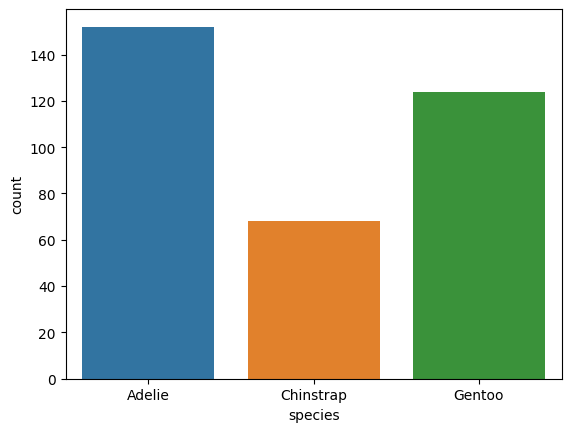

In [3]:
sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum")

<Axes: xlabel='sex', ylabel='count'>

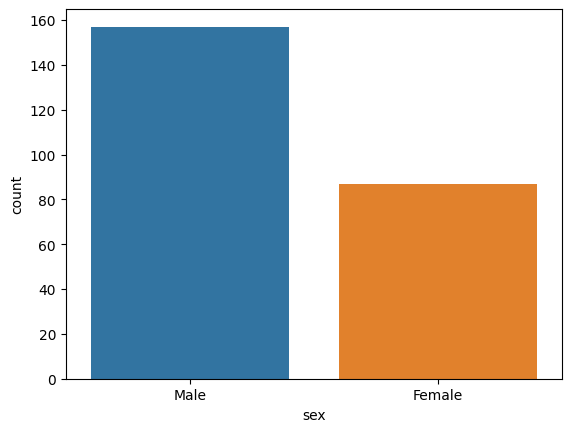

In [4]:
# PROMPT 1
# Are there more males or females in the tips dataset?
sns.barplot(data=tips, x="sex",y="count", hue="sex",estimator="sum")

In [5]:
tips.value_counts("sex")  #How could you verify that your graph is correct? 


sex
Male      157
Female     87
Name: count, dtype: int64

In [6]:
# PROMPT 2
# Are there more smokers or non-smokers in the tips dataset?
tips.value_counts("smoker")

smoker
No     151
Yes     93
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

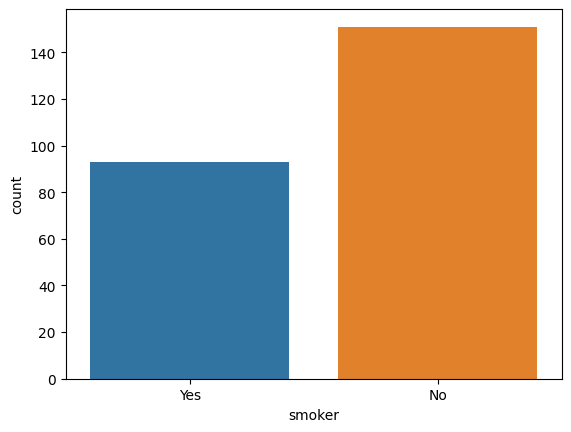

In [7]:
sns.barplot(data=tips, x="smoker",y="count", hue="smoker",estimator="sum")

## Bar Plots: Averages

This code displays the average penguin mass by species. The default `estimator='mean'`

<Axes: xlabel='species', ylabel='body_mass_g'>

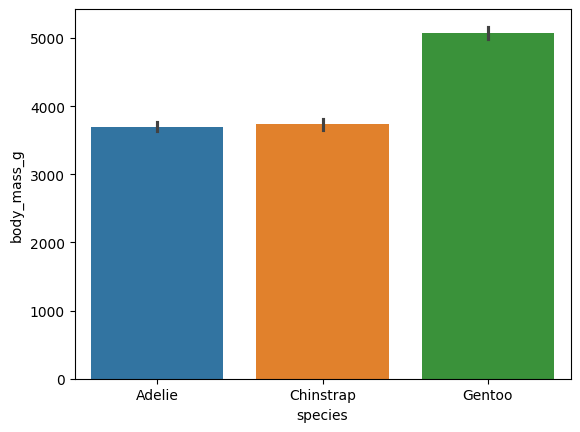

In [8]:
sns.barplot(data=pengo, x="species", y="body_mass_g", hue="species")   #we don't see a mean here because that is the default but I could code it.....

<Axes: xlabel='species', ylabel='body_mass_g'>

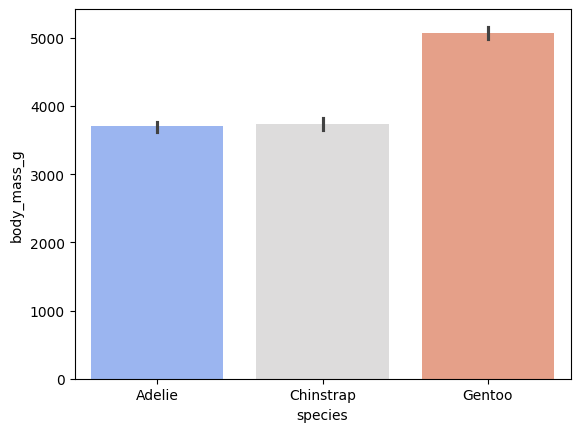

In [9]:
sns.barplot(data=pengo, x="species", y="body_mass_g", hue="species", palette='coolwarm')   #we don't see a mean here because that is the default but I could code it.....

<Axes: xlabel='sex', ylabel='tip'>

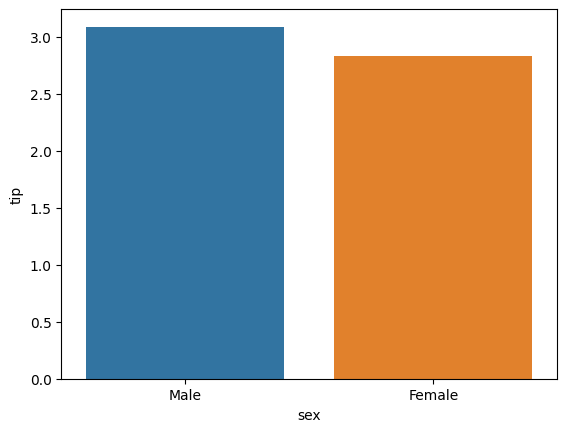

In [10]:
# PROMPT 3
# What is the average tip by gender?
sns.barplot(data=tips,  x="sex", y="tip", hue="sex", estimator="mean", errorbar=None)

In [ ]:
# PROMPT 4
# Who tips more smokers or non-smokers?
sns.barplot(data=tips, x="smoker", y="tip", hue="smoker", estimator="mean", errorbar=None)

## Adding a Series to a bar plot

This code breaks down the penguin species mass by island. Which island has the most penguins? which species is dominant on each island?

In [ ]:
sns.barplot(data=pengo, x="species", y="count", hue="island", estimator="sum", theme=)

In [ ]:
# PROMPT 5
# get a count of tips by sex and smoker
sns.barplot(data=tips,x='sex', y='count', estimator='sum', hue='smoker') 

In [ ]:
# PROMPT 6
# get a count of tips by day and time. Explain why the data appears as it does!
sns.barplot(data=tips,x='day', y='count', estimator='sum', hue='time')

In [ ]:
pengo.sample()

In [ ]:
tips.sample()

## Scatter plots

What is the relationship between flipper length and bill length by species!

In [ ]:
sns.lmplot(data=pengo, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [ ]:
# PROMPT 7
# Show the relationship between bill and tip by gender
sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex")

In [ ]:
# PROMPT 8
# Show the relationship between bill and tip by smoker
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker")

In [ ]:
# PROMPT 9
# Show the relationship between bill and tip by lunch/dinner
sns.lmplot(data=tips, x="total_bill", y="tip", hue="time")

In [ ]:
pengo.sample()

In [ ]:
tips.sample()

In [ ]:
tips['size'].value_counts()

In [ ]:
tips[ tips['size'] == 1 ]

In [ ]:
tips.sort_values("tip").tail(10)

In [ ]:
tips['ratio'] =  tips['tip']  / tips['total_bill']

In [ ]:
tips.sort_values('ratio').tail(10)

In [ ]:
tips.describe()

## Interact Example

This example allows the user to select two variables to compare from the following:

`['bill_length_mm;', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']`

it will then compare them using an `lmplot()` for each species. 


In [ ]:
choices = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categories = ['species', 'island', 'sex']


@interact_manual(x=choices, y=choices, hue=categories)
def onclick(x, y, hue):
    sns.lmplot(data=pengo, x=x, y=y, hue=hue, markers="+")

### Prompt 10: Interact for tips

Among the following 4 Series:  

`['sex', 'smoker', 'day', 'time']`

Plot a bar of average tip `size`, allowing the user to choose which of the 4 series appears on the horizontal axis, and the other as part of the legend. Do not show the error bars


In [ ]:

# PROMPT 10
choices = ['sex', 'smoker', 'day', 'time']
@interact_manual(x=choices, hue=choices)
def onclick(x,hue):
    sns.barplot(data=tips, x=x, y='size', hue=hue, errorbar=None)    

## Timeseries Line Plots

Let's take another look at the `health` dataset. The last few challenges will use this dataset. Since it has a `Year` Series, it is suitable for line plots. 

In [ ]:
health.sample(5)

In [ ]:

# PROMPT 11
# Plot average life expectancy for all countries by year
sns.lineplot(data=health, x="Year", y="Life_Expectancy", estimator="mean")

In [ ]:
# PROMPT 12
# # Plot average life expectancy by year, broken our for each country as a legend
sns.lineplot(data=health, x="Year", y="Life_Expectancy", hue="Country", estimator="mean")

## Final Plot

Figure out the best way to plot this:

Compare life expectancy to Spending. Show each country in the legend

In [ ]:
# PROMPT 13
sns.scatterplot(data=health, x="Spending_USD", y="Life_Expectancy", hue="Country")

In [ ]:
# run this code to turn in your work!
from casstools.assignment import Assignment
Assignment().submit()